In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

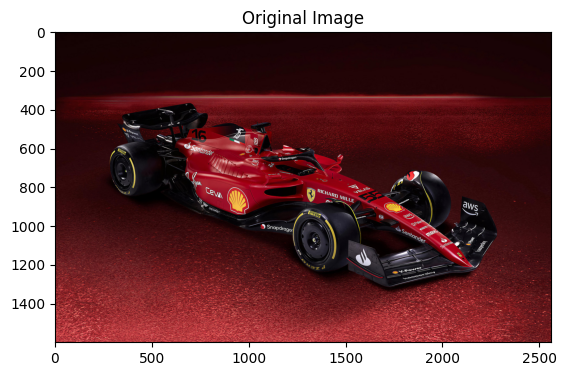

In [10]:
image = cv2.imread('Ferrari.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.show()

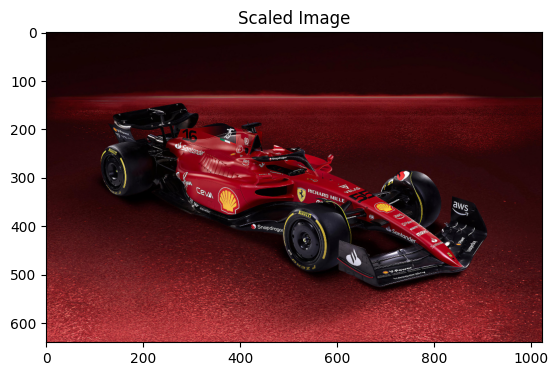

In [11]:
# Resize the image for faster processing
scaled_image = cv2.resize(image, (1024, int(1024 * image.shape[0] / image.shape[1])))

# Display the scaled image
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()

In [12]:
mask = np.zeros(image.shape[:2], np.uint8)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100) 

In [13]:
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

In [14]:
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.89513080e-02, 3.74809108e-01, 1.60036555e-01, 6.12220467e-02,
         3.74980982e-01, 2.19279230e+02, 9.06220880e+01, 8.99436828e+01,
         3.13940828e+01, 4.25882019e+00, 6.30652586e+00, 1.33118988e+02,
         3.44733797e+01, 3.86414007e+01, 1.79104681e+02, 5.75947599e+01,
         6.14388467e+01, 7.22137821e+01, 1.39601974e+01, 1.70621986e+01,
         4.17505819e+02, 2.54978037e+02, 2.59806037e+02, 2.54978037e+02,
         5.36157826e+02, 4.45779493e+02, 2.59806037e+02, 4.45779493e+02,
         4.29826560e+02, 6.61932714e+01, 1.22953996e+01, 1.45094977e+01,
         1.22953996e+01, 3.29047856e+00, 2.76459664e+00, 1.45094977e+01,
         2.76459664e+00, 4.98794348e+00, 2.72072787e+02, 8.79048205e+01,
         9.60025397e+01, 8.79048205e+01, 1.0

In [15]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
output = image * mask2[:, :, np.newaxis]

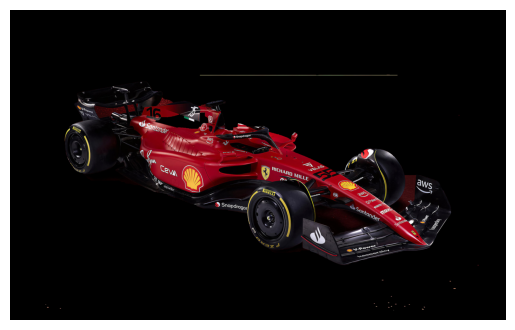

In [16]:
plt.imshow(output)
plt.axis('off')
plt.show()
